<a href="https://colab.research.google.com/github/martha-irungu/Week6_Core_IP/blob/master/Week_6_ML_IP__Martha_Irungu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Football results Prediction

### a) Specifying the Data Analysis Question

Creating a model to predict the result of a game between teams considering home score and rank, away score and rank and the tournament.

### b.) Defining metric for success.

This analysis requires combination of metrics that will be used to assess the accuracy and suitability of our models to meet the objective of the task. The model should abide  by the assumptions of plynomial and logistic regression and give the least RMSE score.

### c.) Understanding the context.


The data in this analysis falls within the context of soccer. The FIFA/Coca-Cola World Ranking (FWR) was developed over two years
during which time a large number of different algorithms was tested and extensively discussed.
Throughout this review and consultation process, the main aim was to identify an algorithm that is not
only intuitive, easy to understand and improves overall accuracy of the formula, but also addresses
feedback received about the previous model and provides fair and equal opportunities for all teams
across all confederations to ascend the FWR.

 Each of these factors have varying significance in terms of the influence they have in predicting the result of a game between team 1 and team 2, based on who's home and who's away, and the tournament



### d.) Recording the Experimental Design

The following steps were implemented

1.) Business Understanding, this keeps you grounded to the main question and gives light throughout all your analysis.

2.) Reading the data.

3.) Data Exploration

4.) Data Wrangling, here is where I performed all my data cleaning and preparation to make my data ready for analysis.

5.) EDA, here is where I did my analysis and visualization of the data.

6.) Feature Engineering, preparing my data for modeling.

7.) Model Development.

### e.) Data Relevance

Given the problem , the data was relevant. 

# 2. Data Preparation and Cleaning

In [86]:
#Import libaries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### 2.1 Loading and previewing Data.

In [5]:
#previewing our dataset
df = pd.read_csv('fifa_ranking.csv')
df.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [ ]:
#Checking the shape
df.shape 

(57793, 16)

In [6]:
#previewing our dataset
df1 = pd.read_csv('results.csv')
df1.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [ ]:
#Checking the shape
df1.shape

(40839, 9)

In [ ]:
#Checking countries in our dataset
df['country_full'].unique()

array(['Germany', 'Italy', 'Switzerland', 'Sweden', 'Argentina',
       'Republic of Ireland', 'Russia', 'Brazil', 'Norway', 'Denmark',
       'England', 'France', 'Spain', 'Mexico', 'RCS', 'Netherlands',
       'Nigeria', 'Belgium', 'Colombia', 'Poland', 'Romania', 'Uruguay',
       'Portugal', 'Cameroon', 'Zambia', 'Egypt', 'Wales', 'USA',
       "Côte d'Ivoire", 'Scotland', 'Tunisia', 'Greece', 'Morocco',
       'Algeria', 'Ecuador', 'Korea Republic', 'Bulgaria', 'Austria',
       'Costa Rica', 'Northern Ireland', 'Honduras', 'Hungary', 'Japan',
       'Saudi Arabia', 'China PR', 'Canada', 'Finland', 'Ghana', 'Chile',
       'Zimbabwe', 'Qatar', 'Australia', 'Iceland', 'IR Iran',
       'United Arab Emirates', 'Yugoslavia', 'Iraq', 'Senegal', 'Bolivia',
       'Kuwait', 'Korea DPR', 'El Salvador', 'Turkey', 'Gabon', 'Guinea',
       'Thailand', 'Paraguay', 'Malawi', 'Israel', 'Peru', 'Zaire',
       'Cyprus', 'Singapore', 'Mali', 'Malaysia', 'Bermuda', 'Niger',
       'Syria', 'Bahr

In [24]:
#Renaming our columns 
df.rename({'country_full': 'country'}, axis =1, inplace =True)
df.head(3)

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [25]:
#Merge the data frames

df2=pd.merge (df,df1, on ='country')
df2.head()


,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,1,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1909-04-04,Germany,Switzerland,1,0,Friendly,Karlsruhe,False
1,1,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1910-05-16,Germany,Belgium,0,3,Friendly,Duisburg,False
2,1,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1910-10-16,Germany,Netherlands,1,2,Friendly,Kleve,False
3,1,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1911-03-26,Germany,Switzerland,6,2,Friendly,Stuttgart,False
4,1,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1911-10-09,Germany,Austria,1,2,Friendly,Dresden,False


In [26]:
#Creating a column on status of the game results: Win, lose and draw
df2.loc[df2['home_score'] < df2['away_score'] ,'status'] = 0 # stands for'Lose'
df2.loc[df2['home_score'] > df2['away_score'], 'status'] = 1 #stands for 'Win'
df2.loc[df2['home_score'] == df2['away_score'], 'status'] = 2 # stands for'Draw' 

In [27]:
df2.head()

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,neutral,status
0,1,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1909-04-04,Germany,Switzerland,1,0,Friendly,Karlsruhe,False,1.0
1,1,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1910-05-16,Germany,Belgium,0,3,Friendly,Duisburg,False,0.0
2,1,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1910-10-16,Germany,Netherlands,1,2,Friendly,Kleve,False,0.0
3,1,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1911-03-26,Germany,Switzerland,6,2,Friendly,Stuttgart,False,1.0
4,1,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1911-10-09,Germany,Austria,1,2,Friendly,Dresden,False,0.0


In [ ]:
#Checking shape of the merged dataset
df2.shape 

(9335036, 25)

In [ ]:
#Checking details of our new dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9335036 entries, 0 to 9335035
Data columns (total 25 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   rank                     int64  
 1   country                  object 
 2   country_abrv             object 
 3   total_points             float64
 4   previous_points          float64
 5   rank_change              float64
 6   cur_year_avg             float64
 7   cur_year_avg_weighted    float64
 8   last_year_avg            float64
 9   last_year_avg_weighted   float64
 10  two_year_ago_avg         float64
 11  two_year_ago_weighted    float64
 12  three_year_ago_avg       float64
 13  three_year_ago_weighted  float64
 14  confederation            object 
 15  rank_date                object 
 16  date                     object 
 17  home_team                object 
 18  away_team                object 
 19  home_score               int64  
 20  away_score               int64  
 21  tourname

In [28]:
#changing data types to right format
#Changing date from object to date time
df2.date=pd.to_datetime(df2.date)


In [29]:
#changing data types to right format
#Changing date from object to date time
df2.rank_date=pd.to_datetime(df2.date)

In [30]:
#Changing status from float to integer data type

df2['status'] = df2['status'].apply(np.int64)


In [ ]:
#changing data types in object format to categorical

df2.loc[:, df2.dtypes == 'object'] =\
df2.select_dtypes(['object'])\
.apply(lambda x: x.astype('category'))

df2.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10246510 entries, 0 to 10246509
Data columns (total 25 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   rank                     int64         
 1   country                  category      
 2   country_abrv             category      
 3   total_points             float64       
 4   previous_points          int64         
 5   rank_change              int64         
 6   cur_year_avg             float64       
 7   cur_year_avg_weighted    float64       
 8   last_year_avg            float64       
 9   last_year_avg_weighted   float64       
 10  two_year_ago_avg         float64       
 11  two_year_ago_weighted    float64       
 12  three_year_ago_avg       float64       
 13  three_year_ago_weighted  float64       
 14  confederation            category      
 15  rank_date                datetime64[ns]
 16  date                     datetime64[ns]
 17  home_team                

In [ ]:
#Checking for duplicates
df2.duplicated().sum()

#Our daset has 424639 duplicates

424639

In [ ]:
#Dropping the duplicates
df2.drop_duplicates(keep=False, inplace=True)


In [ ]:
#Checking if duplicates have been removed
df2.duplicated().sum()


0

In [ ]:
#Checking for null values
df2.isnull().sum()

rank                       0
country                    0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
date                       0
home_team                  0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
city                       0
neutral                    0
status                     0
dtype: int64

*Observation*

Our dataset has no null values




# 3. Data Exploration

In [ ]:
#Checking column names
df2.columns 

Index(['rank', 'country', 'country_abrv', 'total_points', 'previous_points',
       'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'rank_date', 'date', 'home_team', 'away_team', 'home_score',
       'away_score', 'tournament', 'city', 'neutral'],
      dtype='object')

In [ ]:
#get to know unique values in each column

my_cols = df2.columns.to_list()

for column in my_cols:
    print("\n")
    print("Column Name:", column)
    print(df2[column].unique())




Column Name: rank
[  1   5   4   3   2   6   9  11   8  12  14  10   7  13  16  19  17  18
  20  21  15  22  26  31  35  39  43  47  51  56  61  63  64  65  62  68
  69  70  81  73  76  77  82  83  60  54  53  50  49  48  52  55  57  58
  59  67  45  44  41  40  42  38  36  37  25  46  27  24  23  29  30  28
  32  33  34  66  84  86  87  88  85  71  74  75  72  78  79  80  92  90
  96 102  97  89  91  94  98  99 107 108 101 103  95 113 109 110 106 105
 100 104 111 112 116 115 114 117  93 118 122 124 129 119 126 120 131 127
 123 121 130 138 132 139 128 125 133 141 140 144 143 159 167 172 171 168
 165 166 173 174 181 186 188 189 176 160 147 158 169 156 134 137 135 136
 152 142 146 148 149 157 145 150 162 161 163 154 155 153 164 170 151 175
 178 184 183 179 185 180 177 187 182 190 191 192 193 194 196 195 197 198
 199 200 201 202 203 204 206 205 207 208 209]


Column Name: country
['Germany' 'Italy' 'Switzerland' 'Sweden' 'Argentina'
 'Republic of Ireland' 'Russia' 'Brazil' 'Norway' 'Den

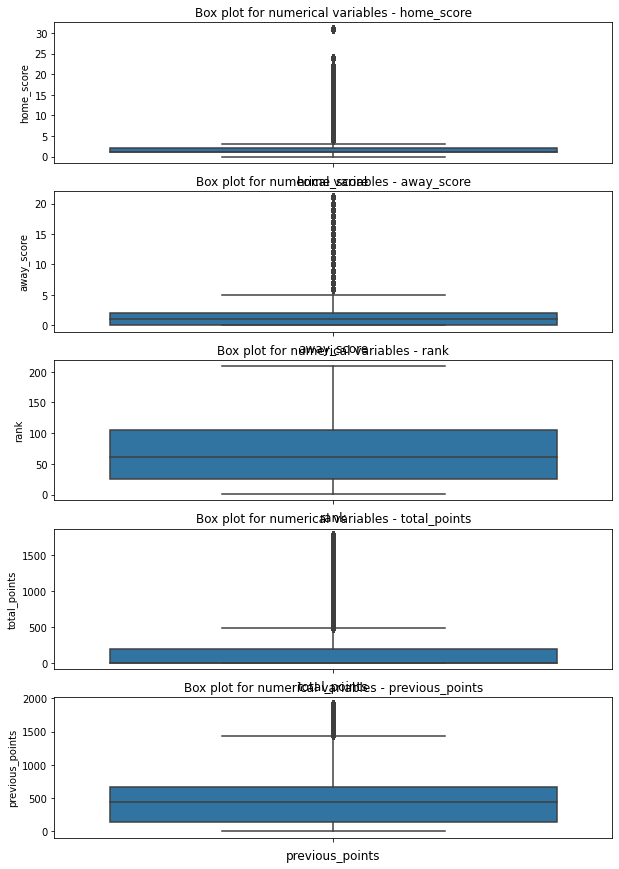

In [ ]:
# checking and dealing with outliers 

col_names= ['home_score','away_score', 'rank','total_points','previous_points']

fig, ax = plt.subplots(len(col_names), figsize=(10,15))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=df2[col_val], ax=ax[i])
    ax[i].set_title('Box plot for numerical variables - {}'.format(col_val), fontsize=12)
    ax[i].set_xlabel(col_val, fontsize=12)

plt.show()

From the box plots, its evident that our data has outliers but we will retain them as away score and home score are among the independent variables that we will use make prediction

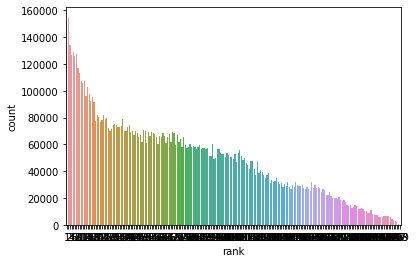

In [ ]:
# Visualizing count of rank

sns.countplot(df2['rank']) 

#This is skewed to the right

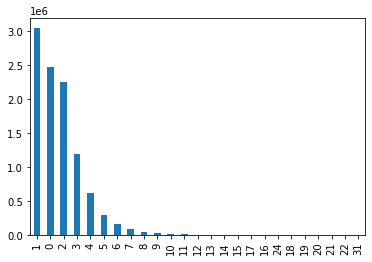

In [ ]:
# Plotting bar graph of home score
df2['home_score'].value_counts().plot.bar()

# This shows that highest number of teams scored 1 goal

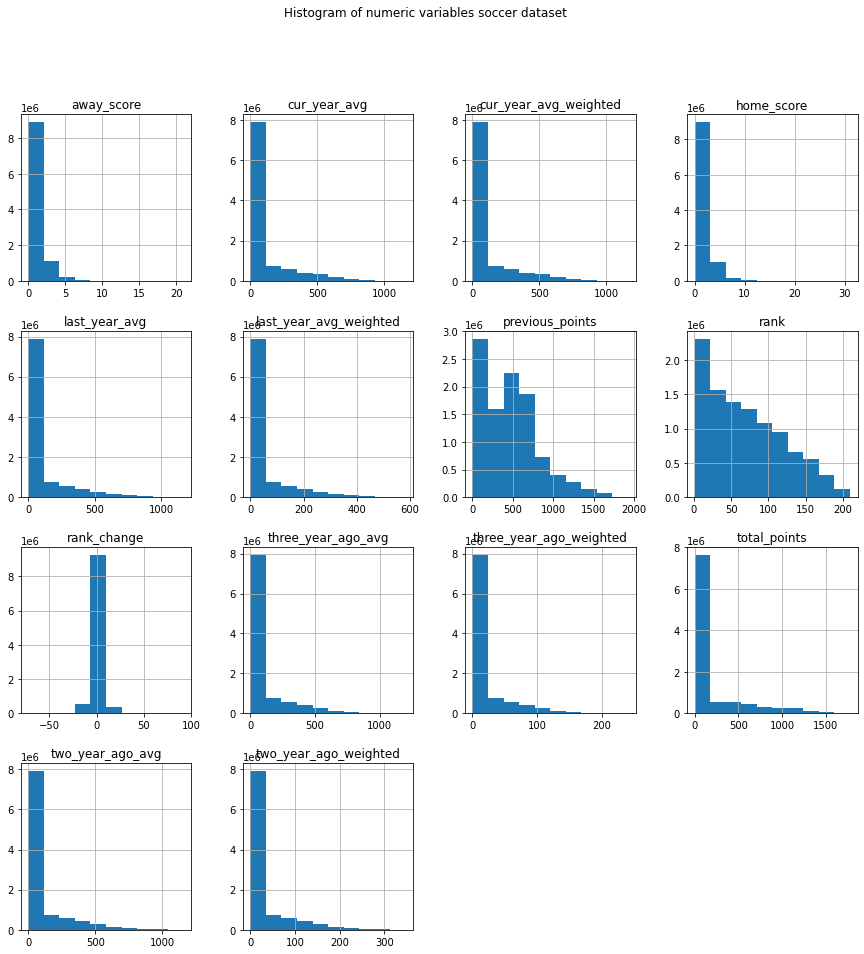

In [ ]:
#Plotting our numerical variables on histogram to assess the relationship

df2.hist(bins=10, figsize=(15,15))
plt.suptitle("Histogram of numeric variables soccer dataset")
plt.savefig('predicting results of a game Histogram')
plt.show()

Observation

Most of our variables are skewed to the right

In [ ]:
#plot color scaled correlation matrix
corr=df2.corr()
corr.style.background_gradient(cmap='coolwarm')

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_score,away_score
rank,1.000000,-0.280767,-0.625509,-0.057662,-0.281745,-0.281745,-0.260714,-0.260713,-0.252277,-0.252276,-0.246161,-0.246160,-0.088703,0.092093
total_points,-0.280767,1.000000,0.532363,0.017465,0.977573,0.977573,0.941792,0.941793,0.932228,0.932229,0.924477,0.924477,0.030191,-0.022212
previous_points,-0.625509,0.532363,1.000000,-0.023358,0.523699,0.523699,0.502008,0.502008,0.489961,0.489961,0.483381,0.483381,0.064502,-0.053221
rank_change,-0.057662,0.017465,-0.023358,1.000000,0.038851,0.038851,-0.011055,-0.011055,-0.000875,-0.000875,0.000969,0.000969,0.000127,-0.000605
cur_year_avg,-0.281745,0.977573,0.523699,0.038851,1.000000,1.000000,0.865904,0.865904,0.878261,0.878262,0.867006,0.867006,0.028740,-0.020462
cur_year_avg_weighted,-0.281745,0.977573,0.523699,0.038851,1.000000,1.000000,0.865904,0.865904,0.878261,0.878262,0.867006,0.867006,0.028740,-0.020462
last_year_avg,-0.260714,0.941792,0.502008,-0.011055,0.865904,0.865904,1.000000,1.000000,0.863915,0.863915,0.882913,0.882913,0.028775,-0.021648
last_year_avg_weighted,-0.260713,0.941793,0.502008,-0.011055,0.865904,0.865904,1.000000,1.000000,0.863915,0.863915,0.882913,0.882913,0.028775,-0.021648
two_year_ago_avg,-0.252277,0.932228,0.489961,-0.000875,0.878261,0.878261,0.863915,0.863915,1.000000,1.000000,0.869061,0.869062,0.029052,-0.021830
two_year_ago_weighted,-0.252276,0.932229,0.489961,-0.000875,0.878262,0.878262,0.863915,0.863915,1.000000,1.000000,0.869062,0.869062,0.029052,-0.021830


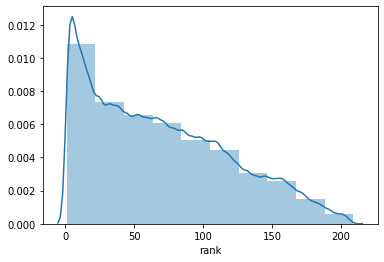

In [ ]:
# Ditribution plot for rank
sns.distplot(df2['rank'], bins=10) 

#Rank is skewed to the right

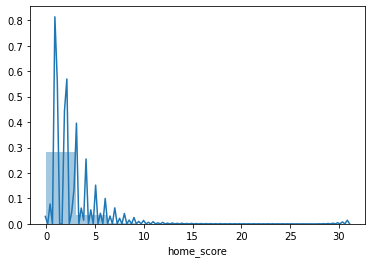

In [ ]:
# Ditribution plot for rank
sns.distplot(df2['home_score'], bins=10) 

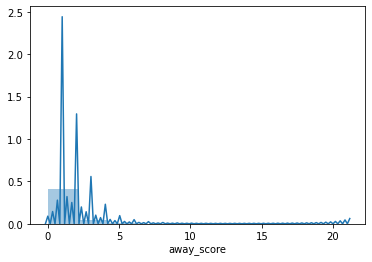

In [ ]:
# Ditribution plot for rank
sns.distplot(df2['away_score'], bins=10) 

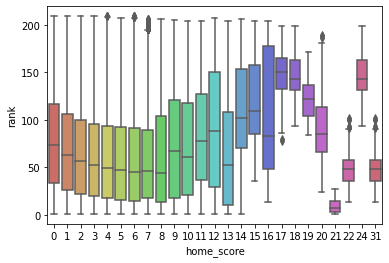

In [ ]:
# Box plots on home score and rank
# 
sb.boxplot(x='home_score', y='rank', data=df2, palette='hls')

#The lower the  home score the lower the rank

In [31]:
#Encoding confederation column
confederation = pd.get_dummies(df2['confederation' ],drop_first=True)
confederation.head() 

,CAF,CONCACAF,CONMEBOL,OFC,UEFA
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [32]:
#Encoding tournament from categorical to labels

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_encoder.fit(df2['tournament'])
df2['tournament'] = label_encoder.transform(df2['tournament'])

df2.head()


,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,neutral,status
0,1,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1909-04-04,1909-04-04,Germany,Switzerland,1,0,45,Karlsruhe,False,1
1,1,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1910-05-16,1910-05-16,Germany,Belgium,0,3,45,Duisburg,False,0
2,1,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1910-10-16,1910-10-16,Germany,Netherlands,1,2,45,Kleve,False,0
3,1,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1911-03-26,1911-03-26,Germany,Switzerland,6,2,45,Stuttgart,False,1
4,1,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1911-10-09,1911-10-09,Germany,Austria,1,2,45,Dresden,False,0


In [33]:
#Encoding neutral column
neutral = pd.get_dummies(df2['neutral' ],drop_first=True)
neutral.head()

,True
0,0
1,0
2,0
3,0
4,0


In [34]:
#Encoding confedaration column
df2.drop(['confederation','neutral'],axis=1,inplace=True)
df2.head() 

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,status
0,1,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1909-04-04,1909-04-04,Germany,Switzerland,1,0,45,Karlsruhe,1
1,1,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1910-05-16,1910-05-16,Germany,Belgium,0,3,45,Duisburg,0
2,1,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1910-10-16,1910-10-16,Germany,Netherlands,1,2,45,Kleve,0
3,1,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1911-03-26,1911-03-26,Germany,Switzerland,6,2,45,Stuttgart,1
4,1,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1911-10-09,1911-10-09,Germany,Austria,1,2,45,Dresden,0


In [35]:
# Concat the columns in the dataset to create a new dataset

df3 = pd.concat([df2,confederation,neutral],axis=1)
df3.head() 


,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,status,CAF,CONCACAF,CONMEBOL,OFC,UEFA,True
0,1,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1909-04-04,1909-04-04,Germany,Switzerland,1,0,45,Karlsruhe,1,0,0,0,0,1,0
1,1,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1910-05-16,1910-05-16,Germany,Belgium,0,3,45,Duisburg,0,0,0,0,0,1,0
2,1,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1910-10-16,1910-10-16,Germany,Netherlands,1,2,45,Kleve,0,0,0,0,0,1,0
3,1,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1911-03-26,1911-03-26,Germany,Switzerland,6,2,45,Stuttgart,1,0,0,0,0,1,0
4,1,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1911-10-09,1911-10-09,Germany,Austria,1,2,45,Dresden,0,0,0,0,0,1,0


In [36]:
#Drop column with categorical data to test for multicollinearity
df3.drop(['country', 'country_abrv','rank_date','date','city','home_team','away_team'],axis=1,inplace=True)
df3.head() 

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_score,away_score,tournament,status,CAF,CONCACAF,CONMEBOL,OFC,UEFA,True
0,1,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,45,1,0,0,0,0,1,0
1,1,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3,45,0,0,0,0,0,1,0
2,1,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2,45,0,0,0,0,0,1,0
3,1,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,2,45,1,0,0,0,0,1,0
4,1,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2,45,0,0,0,0,0,1,0


Checking for multicollinearity

In [ ]:
#Compute VIF data for each independent variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame() 

vif["features"] = df3.columns 
vif["vif_Factor"] = [variance_inflation_factor(df2.values, i) for i in range(df3.shape[1])]
vif 

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,vif_Factor
0,rank,1.822219e+00
1,total_points,9.706179e+05
2,previous_points,2.674711e+00
3,rank_change,1.015654e+00
4,cur_year_avg,inf
5,cur_year_avg_weighted,inf
6,last_year_avg,2.606335e+09
7,last_year_avg_weighted,2.606327e+09
8,two_year_ago_avg,1.277520e+09
9,two_year_ago_weighted,1.277392e+09


From this analysis it is clear that home_score,away_score,rank_change,rank,tournament are independent of each other. We will therefore use these features to make our prediction

In [38]:
# Dropping the features with high VIF to how the VIF scores improve in the remaining features in our dataset
df3 = df3.drop(columns=['previous_points','cur_year_avg','total_points','cur_year_avg_weighted','last_year_avg','last_year_avg_weighted','three_year_ago_avg','three_year_ago_weighted','two_year_ago_avg',
       'two_year_ago_weighted'])

correlations = df3.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,rank,rank_change,home_score,away_score,tournament,status,CAF,CONCACAF,CONMEBOL,OFC,UEFA,True
rank,1.512522,0.088833,0.121097,-0.111570,0.010470,0.050144,0.060782,-0.000914,0.534092,-0.191485,0.814263,0.052859
rank_change,0.088833,1.005588,0.007633,-0.003034,-0.002446,0.002135,0.014264,-0.002134,0.018977,-0.006586,0.046864,0.002346
home_score,0.121097,0.007633,1.036420,0.088322,0.038903,-0.063864,0.074226,-0.007365,0.043345,-0.069559,0.046766,0.027058
away_score,-0.111570,-0.003034,0.088322,1.297459,0.012555,0.569356,0.057099,0.010874,-0.030467,-0.036261,-0.112599,-0.067856
tournament,0.010470,-0.002446,0.038903,0.012555,1.169072,0.000274,0.288199,0.050122,0.137565,-0.102239,-0.155106,0.121182
status,0.050144,0.002135,-0.063864,0.569356,0.000274,1.274286,-0.026676,-0.008958,0.003048,-0.006840,0.018694,0.020035
CAF,0.060782,0.014264,0.074226,0.057099,0.288199,-0.026676,1.844640,0.749019,0.762164,0.234943,1.194504,0.260878
CONCACAF,-0.000914,-0.002134,-0.007365,0.010874,0.050122,-0.008958,0.749019,1.455453,0.543303,0.203960,0.905133,0.162656
CONMEBOL,0.534092,0.018977,0.043345,-0.030467,0.137565,0.003048,0.762164,0.543303,1.623049,0.120671,1.144924,0.179997
OFC,-0.191485,-0.006586,-0.069559,-0.036261,-0.102239,-0.006840,0.234943,0.203960,0.120671,1.102535,0.245955,-0.000988


In [84]:
#Checking the mean for home score, away score and game result :status for comparison with RMSE
df3.describe()

,rank,rank_change,home_score,away_score,tournament,status,CAF,CONCACAF,CONMEBOL,OFC,UEFA,True
count,1.851385e+06,1.851384e+06,1.851385e+06,1.851385e+06,1.851385e+06,1.851385e+06,1.851385e+06,1.851385e+06,1.851385e+06,1.851385e+06,1.851385e+06,1.851385e+06
mean,6.094629e+01,-5.795772e-02,1.799568e+00,1.213502e+00,4.115700e+01,9.514785e-01,2.055531e-01,1.067201e-01,9.766472e-02,1.430605e-02,3.980528e-01,2.141143e-01
std,4.562202e+01,5.323129e+00,1.776495e+00,1.386679e+00,1.865162e+01,7.134722e-01,4.041054e-01,3.087571e-01,2.968609e-01,1.187493e-01,4.894966e-01,4.102066e-01
min,1.000000e+00,-7.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.100000e+01,-2.000000e+00,1.000000e+00,0.000000e+00,4.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.300000e+01,0.000000e+00,1.000000e+00,1.000000e+00,4.500000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,9.300000e+01,1.000000e+00,3.000000e+00,2.000000e+00,4.500000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,2.020000e+02,9.200000e+01,3.100000e+01,2.100000e+01,8.400000e+01,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


Observation

The mean for home score is 1.799, away score is 1.213 and for status:game results is 9.51

Training the model

Approach 1: Polynomial approach

i)Model 1: Predict how many goals the home team scores.

In [96]:
# Preparing the Data
# Dividing the data into attributes and labels 

X = df3[['away_score', 'tournament','rank']].values
y = df3['home_score'].values 

In [97]:
# Split the dataset into train and test sets
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [99]:
#Fit polynomial Regression features to the dataset

poly = PolynomialFeatures(degree=2)
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)

poly.fit(X_poly, y)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [100]:
#Fit polynomial Regression to the dataset
linreg = LinearRegression()
linreg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
#Predicting
y_pred = linreg.predict(X_poly)


In [112]:
#printing the results

score_pred = pd.DataFrame({'y_predict': y_pred, 'y_test': Y_test})

print(score_pred.sample(5))

#Print the outcome for evaluation
rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(" The Root Mean Square Score is ",rmse_value)

ii)Model 2: Predict how many goals the away team scores.

In [89]:
# Preparing the Data
# Dividing the data into attributes and labels 

X = df3[['home_score','rank','tournament']].values
y = df3['away_score'].values
X

array([[  1,   1,  45],
       [  0,   1,  45],
       [  1,   1,  45],
       ...,
       [  3, 201,  15],
       [  0, 201,  42],
       [  0, 107,  44]])

In [90]:
# Split the dataset into train and test sets
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [92]:
#Fit polynomial Regression to the dataset and train the model

poly = PolynomialFeatures(degree=2)
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)

pol_reg = LinearRegression()
pol_reg.fit(X_train, y_train)

In [82]:
#Fit polynomial Regression to the dataset
poly.fit(X_poly, y)


PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [66]:
#Fit polynomial Regression to the dataset
linreg = LinearRegression()
linreg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Predicting
y_pred = linreg.predict(X_poly) 

In [83]:
#Predicting the results

y_pred = pol_reg.predict(X_test)

away_score_pred = pd.DataFrame({'y_predict': y_pred, 'y_test': y_test})

print(away_score_pred.sample(5))

#Print the outcome for evaluation
rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(" The Root Mean Square Score is ",rmse_value)


         y_predict  y_test
217674    1.037142       1
745239    1.195767       2
752599    0.971377       0
1800585   1.179608       1
1757114   0.286399       0
 The Root Mean Square Score is  0.6326925711517262


Observation

Our model has a RMSE of 0.632 which is higher than 10% of the mean of away score, meaning that our model is not very accurate. We can consider adjusting degree of freedom from the current 2 to get better results.

Approach 2: Logistic regression approach

In [68]:
# Defining our variables
revised= df3[['rank','away_score','home_score','tournament','status']]

revised 

,rank,away_score,home_score,tournament,status
0,1,0,1,45,1
1,1,3,0,45,0
2,1,2,1,45,0
3,1,2,6,45,1
4,1,2,1,45,0
...,...,...,...,...,...
1851380,201,2,3,15,1
1851381,201,7,0,42,0
1851382,201,2,3,15,1
1851383,201,7,0,42,0


In [69]:
#Dividing our dataset into attributes and labels

X=revised.drop('status', axis=1)

y=revised['status'] 

In [70]:
# Splitting our dataset into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [71]:
# # Fitting our model 

from sklearn.linear_model import LogisticRegression 

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
 #Using our model to make a prediction

y_pred = LogReg.predict(X_test) 

In [73]:
# Evaluating the model 
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix


array([[155880,      0,      0],
       [     0, 271483,      0],
       [     0,      0, 128053]])

Observation

The results from the confusion matrix tell us that 155,880, 271,483 and 128,053are the number of correct predictions and 0 are the number of incorrect predictions. This implies overfitting

Feature Engeneering

Selecting the best features by scaling them. We will perform normalization and standardization

In [75]:
#Defining our variables
revised= df3[['rank','away_score','home_score','tournament','status']]

revised 
#Select our features
X=revised.drop('status', axis=1)
y=revised['status']

# Splitting our dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42)

# Performing  standardisation
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_y.fit_transform(X_test)

# Performing normalisation
from sklearn.preprocessing import MinMaxScaler 
norm = MinMaxScaler().fit(X_train) 
X_train = norm.transform(X_train) 
X_test = norm.transform(X_test)

# Fitting in our models  
 
from sklearn.linear_model import LogisticRegression 

# We will select the best 2 features for our model.  

from sklearn.feature_selection import RFE
LogReg = LogisticRegression()
LogReg = RFE(LogReg, n_features_to_select = 2, step=1)

LogReg.fit(X_train, y_train) 

# Making Predictions  
y_pred = LogReg.predict(X_test) 

# Evaluate our model 
from sklearn import metrics 
print('LogReg RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
 
# Displaying our best features
print('LogReg Selected features: %s' % list(X.columns[LogReg.support_]))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogReg RMSE: 0.0
LogReg Selected features: ['away_score', 'home_score']


The best 2 features selected to predict a win, a loss or a draw are away score and home score

The RMSE is 0.0 impying a perfect model, this could be an issue of over fitting

Visualizing residual Plot

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

X = revised.values 
y = revised['status'].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42)

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

# This is our prediction for admission based on our model
y_pred = LogReg.predict(X_test)

# We create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test) 

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean() 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.0